<a href="https://colab.research.google.com/github/Aravinda89/emotion/blob/main/Emotion_Recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Emotion Classification

!pip install fastai==2.0.15
!pip install fastai2==0.0.30
!pip install fastcore==1.0.16
!pip install fastai --upgrade

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

  Using cached fastai-2.0.15-py3-none-any.whl (185 kB)
  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.3
    Uninstalling fastai-2.5.3:
      Successfully uninstalled fastai-2.5.3


  Using cached fastcore-1.0.16-py3-none-any.whl (40 kB)
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.3.27
    Uninstalling fastcore-1.3.27:
      Successfully uninstalled fastcore-1.3.27
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastdownload 0.0.5 requires fastcore>=1.3.26, but you have fastcore 1.0.16 which is incompatible.


  Using cached fastai-2.5.3-py3-none-any.whl (189 kB)
  Using cached fastcore-1.3.27-py3-none-any.whl (56 kB)
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.0.16
    Uninstalling fastcore-1.0.16:
      Successfully uninstalled fastcore-1.0.16
  Attempting uninstall: fastai
    Found existing installation: fastai 2.0.15
    Uninstalling fastai-2.0.15:
      Successfully uninstalled fastai-2.0.15


Mounted at /content/gdrive


In [15]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

import numpy as np
from fastcore.xtras import Path # @patch'd properties to the Pathlib module

from fastai.callback.fp16 import to_fp16
from fastai.callback.schedule import fit_one_cycle, lr_find 

from fastai.data.block import CategoryBlock, DataBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, Normalize, RandomSplitter, RegexLabeller

from fastai.interpret import ClassificationInterpretation
from fastai.learner import Learner # imports @patch'd properties to Learner including `save`, `load`, `freeze`, and `unfreeze`

from fastai.metrics import error_rate

from fastai.vision.augment import aug_transforms, RandomResizedCrop
from fastai.vision.core import imagenet_stats
from fastai.vision.data import ImageDataLoaders, ImageBlock
from fastai.vision.learner import cnn_learner

from torchvision.models.resnet import resnet34, resnet50

import glob
import os
import random
from shutil import copyfile

In [16]:
ls

In [18]:
pwd

'/root'

In [20]:
# cp -r train/* test/

In [3]:
# classes = os.listdir('./train')
# classes

In [4]:
# ls /train/surprise

In [5]:
# for cls in classes:
#   dir_imgs = glob.glob('../validation/'+cls+'/*.jpg')
#   print(cls, len(dir_imgs))
#   random.shuffle(dir_imgs)

#   choose_imgs = dir_imgs[:100]
#   print(cls, len(choose_imgs))

#   for im in choose_imgs:
#     copyfile(im, './test/'+cls+'/'+im.split('/')[-1])

In [17]:
ls gdrive/MyDrive

ls: cannot access 'gdrive/MyDrive': No such file or directory


In [19]:
path_train = '/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train'
path_test = '/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/test'

In [20]:
train_imgs = glob.glob(path_train+'/*/*.jpg')

In [21]:
len(train_imgs)

2127

In [22]:
test_imgs = glob.glob(path_test+'/*/*.jpg')

In [23]:
len(test_imgs)

700

In [24]:
path = Path(path_train)
path

Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train')

In [25]:
path.ls()

(#7) [Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/surprise'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/sad'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/fear'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/happy'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/neutral'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/angry'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/disgust')]

In [26]:
fns = get_image_files(path)
len(fns)

2127

In [27]:
fns[:3]

(#3) [Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/surprise/6019.jpg'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/surprise/28032.jpg'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/surprise/4828.jpg')]

/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/small_dataset/train/happy/17866.jpg


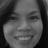

In [32]:
fname = random.choice(list(fns))
print(fname)
im = Image.open(fname)
im

In [33]:
im.shape

(48, 48)

In [34]:
emotion_dblk = DataBlock(
                          blocks=(ImageBlock, CategoryBlock), 
                          get_items=get_image_files, 
                          splitter=RandomSplitter(valid_pct=0.2, seed=42),
                          get_y=parent_label,
                          item_tfms=Resize(48) )

In [35]:
emotion_dblks = emotion_dblk.new(item_tfms=Resize(48, ResizeMethod.Squish))
# cars = cars.new(item_tfms=Resize(224, ResizeMethod.Squish), batch_tfms=aug_transforms(mult=2))
dls = emotion_dblks.dataloaders(path)

In [1]:
dls.train.show_batch(max_n=15, nrows=5, unique=False)

NameError: ignored